In [45]:
import pandas as pd
import numpy as np
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob

In [46]:
log = pd.read_csv('login.csv')

In [47]:
#loading all the access key and token
api_key = log['key'][0]
api_secret = log['key'][1]
access_token = log['key'][2]
access_token_secret = log['key'][3]

In [48]:
#authentication object
authen = tweepy.OAuthHandler(api_key,api_secret)

In [50]:
#setting access token and secret
authen.set_access_token(access_token,access_token_secret)

#creating API
api = tweepy.API(authen, wait_on_rate_limit=True)

In [52]:
#Now extracting 200 tweets of a specific person
tweets = api.user_timeline(screen_name='MichaelVaughan', lang='en', count=200, tweet_mode="extended")

#let's print last 10 tweets
i = 1
for tweet in tweets[0:10]:
    print(str(i) + '.' + tweet.full_text + '\n')
    i= i+1

1.Ruthless performance by @ashwinravi99 !!! India have so many more skilled players for these conditions .. High class .. #INDvENG

2.It’s got the feeling of England being 5 down this evening !!! It’s going to get messy ... #INDvENG

3.This pitch is a Road !!! 😜

4.Morning all btw ... 👍

5.Preparing Green tops is totally wrong .. The Duke ball &amp; our conditions generally make the ball do more anyway .. my belief is all 5 day Test matches the pitch should be prepared to last 5 days .. https://t.co/9kSn1l5WUm

6.Ireland was a 4 day Test .. 👍 https://t.co/3eYFkbCL1Y

7.I am loving it Isabelle .. Great entertainment &amp; only the best are performing .. but I do find it ironic that many who beat the drum about 5 Day Test Cricket are saying this pitch is fine which has been prepared to last just over 3 days !!!! https://t.co/kTwlfam5Bx

8.He may not get a 100 but this @imVkohli innings has been an masterclass on this pitch ... its already 100 balls of batting that all coaches should show

In [53]:
#let's create a dataframe
df = pd.DataFrame([tweet.full_text for tweet in tweets], columns=['Tweets'])
df.head()

,Tweets
0,Ruthless performance by @ashwinravi99 !!! Indi...
1,It’s got the feeling of England being 5 down t...
2,This pitch is a Road !!! 😜
3,Morning all btw ... 👍
4,Preparing Green tops is totally wrong .. The D...


In [55]:
#let's just clean the data
def cleantwt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #cleaning the '@' from text
    text = re.sub(r'#', '', text) #cleaning '#'
    text = re.sub(r'https?:\/\/\S+', '', text) # cleaning the http links
    text = re.sub(r'RT[\s]+', '', text) #cleaning retweets
    return text

df['Tweets'] = df['Tweets'].apply(cleantwt)

#Remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['Tweets'] = df['Tweets'].apply(remove_emoji)
df.head()

,Tweets
0,Ruthless performance by !!! India have so man...
1,It’s got the feeling of England being 5 down t...
2,This pitch is a Road !!!
3,Morning all btw ...
4,Preparing Green tops is totally wrong .. The D...


In [56]:
#function to get Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [57]:
df.head()

,Tweets,Subjectivity,Polarity
0,Ruthless performance by !!! India have so man...,0.608000,0.13200
1,It’s got the feeling of England being 5 down t...,0.344444,-0.25191
2,This pitch is a Road !!!,0.000000,0.00000
3,Morning all btw ...,0.000000,0.00000
4,Preparing Green tops is totally wrong .. The D...,0.453333,-0.03000


### Let's create a Word Cloud

In [58]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

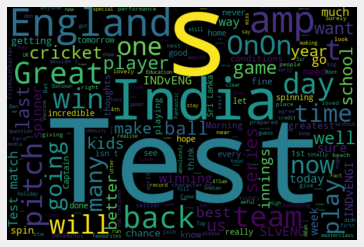

In [59]:
stopwords = set(STOPWORDS)
Words = ''.join([tweets for tweets in df['Tweets']])
wordcloud = WordCloud(width=600, height=400, stopwords=stopwords, random_state=21, max_font_size=200).generate(Words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [61]:
#get the positive, negative and neutral analysis
def txtAnalysis(polar_value):
    if polar_value>0:
        return 'Positive'
    elif polar_value==0:
        return 'Neutral'
    else:
        return 'Negative'
    
df['Analysis'] = df['Polarity'].apply(txtAnalysis)
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,Ruthless performance by !!! India have so man...,0.608000,0.13200,Positive
1,It’s got the feeling of England being 5 down t...,0.344444,-0.25191,Negative
2,This pitch is a Road !!!,0.000000,0.00000,Neutral
3,Morning all btw ...,0.000000,0.00000,Neutral
4,Preparing Green tops is totally wrong .. The D...,0.453333,-0.03000,Negative


In [66]:
#Let's count the number of positive and negative tweets
P = df[df['Analysis']=='Positive'].value_counts().sum()
print('The number of positive tweets are: ', P)

N = df[df['Analysis']=='Negative'].value_counts().sum()
print('The number of negative tweets are: ', N)

The number of positive tweets are:  101
The number of negative tweets are:  29


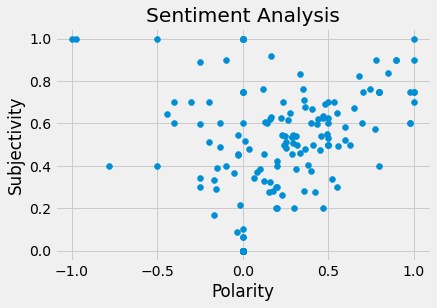

In [67]:
#Let's plot between polarity and subjectivity
plt.scatter(df['Polarity'], df['Subjectivity'])
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Sentiment Analysis')
plt.show()

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


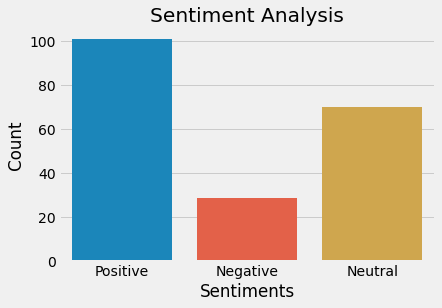

In [69]:
#Let's see the countplot 
import seaborn as sns
sns.countplot(df['Analysis'])
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()